In [55]:
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [25]:
path = 'energydata/*.csv'
csv_files = glob.glob(path)
csv_files
dfs = []

for file in csv_files:
    base = os.path.basename(file)
    date_str = base.replace('OVO Electricity Use ', '').replace('.csv', '')
    try:
        file_date = datetime.strptime(date_str, '%d-%m-%Y').date()
    except ValueError as e:
        print(f"Error parsing date from file name {file}: {e}")
        continue

    try:
        df = pd.read_csv(file)
        df['datetime'] = pd.to_datetime(df['Time'].apply(lambda x: datetime.combine(file_date, datetime.strptime(x, '%H:%M').time())))
        df.drop('Time', axis=1, inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if not dfs:
    raise ValueError("No dataframes were created. Check if the CSV files are correctly read.")
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.sort_values(by='datetime', inplace=True)
first_column = combined_df.pop('datetime')
combined_df.insert(0, 'datetime', first_column)

combined_df.to_csv('combined_energy_usage.csv', index=False)

In [46]:
energy_df= pd.read_csv('combined_energy_usage.csv')
energy_df['datetime'] = pd.to_datetime(energy_df['datetime'])
energy_df

,datetime,Consumption (kWh)
0,2023-11-01 00:00:00,0.02
1,2023-11-01 00:30:00,0.03
2,2023-11-01 01:00:00,0.01
3,2023-11-01 01:30:00,0.35
4,2023-11-01 02:00:00,0.01
...,...,...
1387,2023-11-29 21:30:00,1.02
1388,2023-11-29 22:00:00,1.25
1389,2023-11-29 22:30:00,0.46
1390,2023-11-29 23:00:00,0.78


In [51]:
weather_df=pd.read_csv('sheffield 2023-11-01 to 2023-11-29.csv')
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
columns_to_drop = ['name','preciptype','severerisk','stations','visibility','snowdepth','snow','conditions']
weather_df = weather_df.drop(columns=columns_to_drop)

In [60]:
energy_weather_df = pd.merge(energy_df, weather_df, on='datetime', how='left')
energy_weather_df=energy_weather_df.dropna()
energy_weather_df.to_csv('energy_weather_dataset.csv', index=False)

In [57]:
def is_midnight(row):
    return 0 <= row.hour < 5

energy_weather_df['midnight_flag'] = energy_weather_df['datetime'].apply(is_midnight)
energy_weather_df

,datetime,Consumption (kWh),temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,icon,midnight_flag
0,2023-11-01 00:00:00,0.02,7.8,5.9,7.7,99.11,0.235,100.0,15.7,11.0,104.0,997.4,87.6,0.0,0.0,0.0,rain,True
2,2023-11-01 01:00:00,0.01,8.0,6.0,7.8,99.11,0.528,100.0,16.1,11.3,120.0,996.2,100.0,0.0,0.0,0.0,rain,True
4,2023-11-01 02:00:00,0.01,8.3,5.6,8.1,99.04,0.701,100.0,23.3,16.4,113.0,994.7,100.0,0.0,0.0,0.0,rain,True
6,2023-11-01 03:00:00,0.01,8.6,5.5,8.4,99.15,0.742,100.0,28.5,20.5,123.0,993.0,100.0,0.0,0.0,0.0,rain,True
8,2023-11-01 04:00:00,0.01,8.9,5.8,8.8,99.30,0.768,100.0,31.4,22.4,128.0,991.3,100.0,0.0,0.0,0.0,rain,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,2023-11-29 19:00:00,0.15,-1.7,-4.3,-2.9,91.51,0.000,0.0,8.2,6.6,342.0,1004.4,49.7,0.0,0.0,0.0,partly-cloudy-night,False
1384,2023-11-29 20:00:00,0.88,-1.6,-4.6,-2.9,91.05,0.000,0.0,9.9,7.9,312.0,1004.3,29.2,0.0,0.0,0.0,partly-cloudy-night,False
1386,2023-11-29 21:00:00,1.82,-1.9,-4.6,-3.2,90.38,0.000,0.0,8.8,7.2,335.0,1004.2,68.4,0.0,0.0,0.0,partly-cloudy-night,False
1388,2023-11-29 22:00:00,1.25,-1.8,-4.5,-3.4,89.10,0.000,0.0,9.5,7.0,335.0,1004.1,37.8,0.0,0.0,0.0,partly-cloudy-night,False


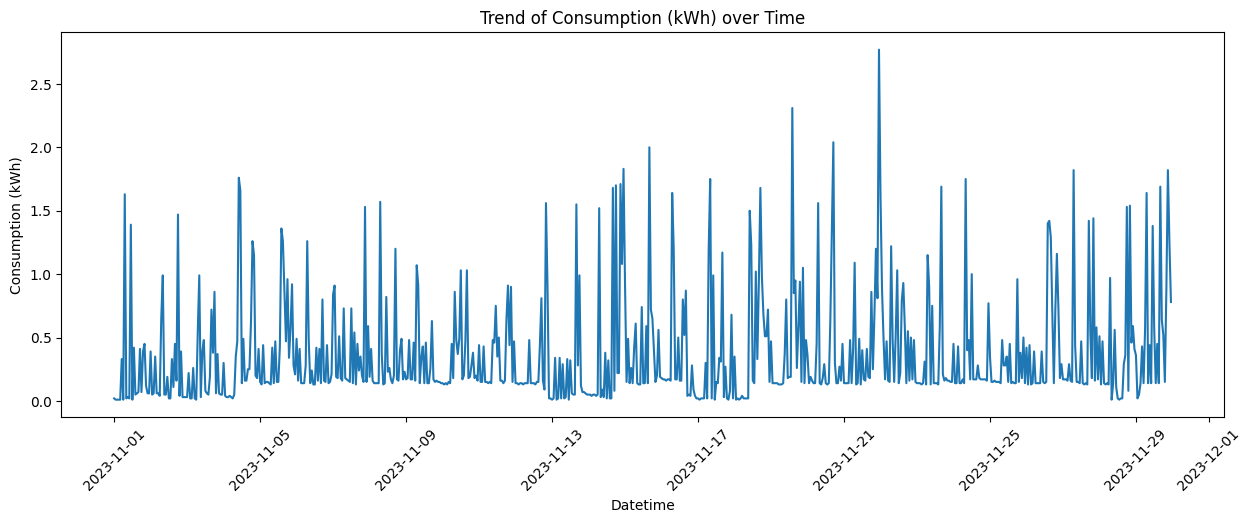

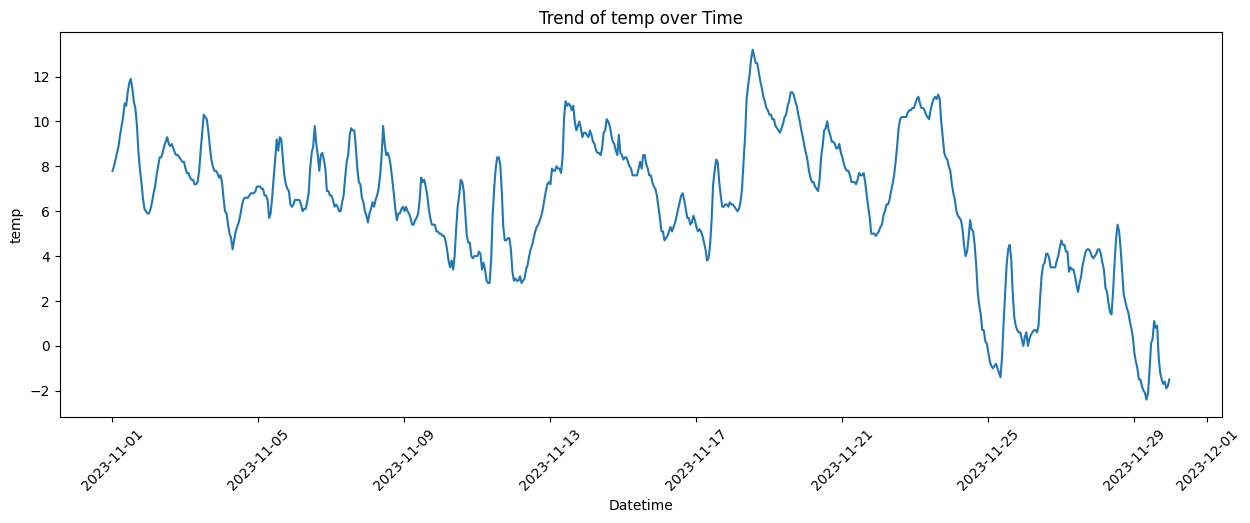

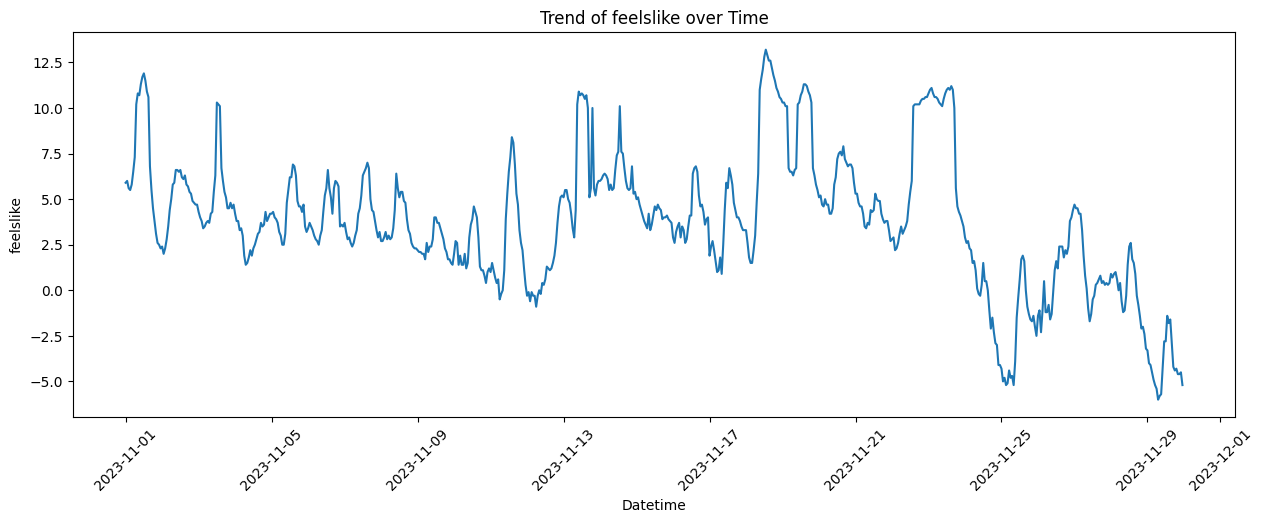

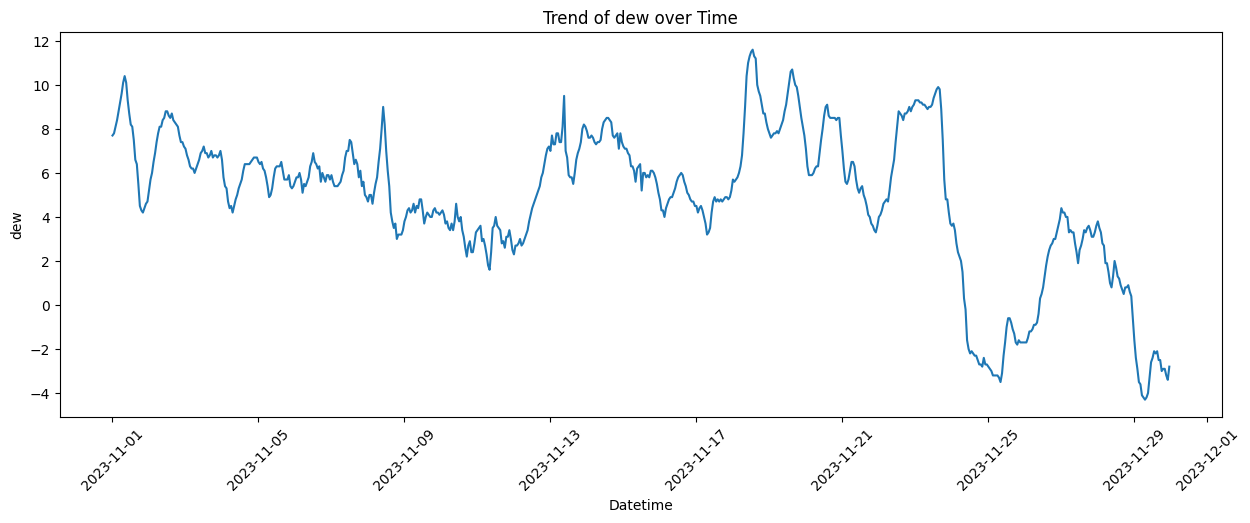

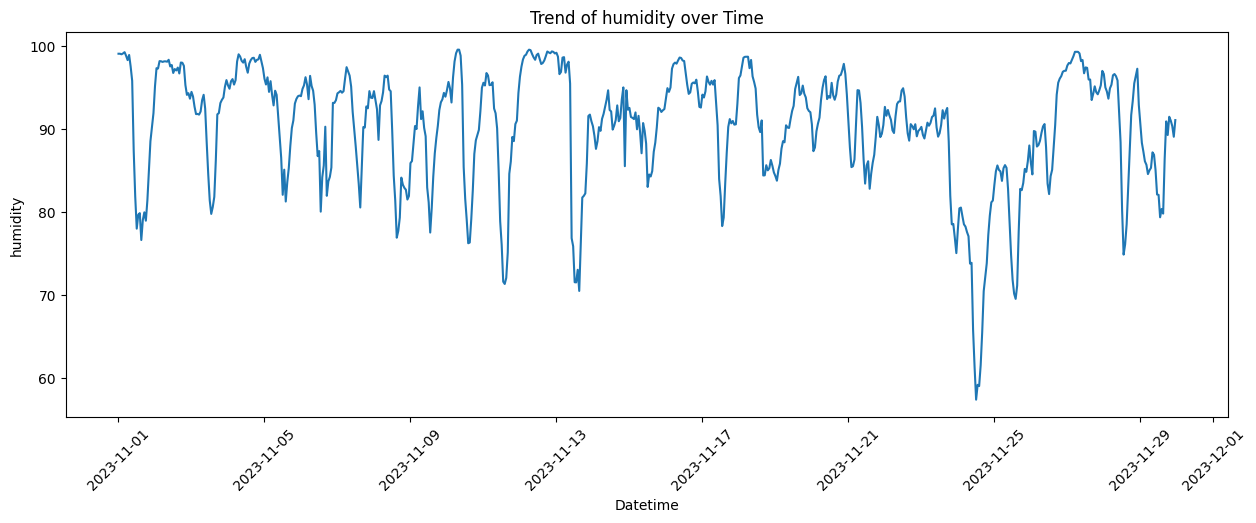

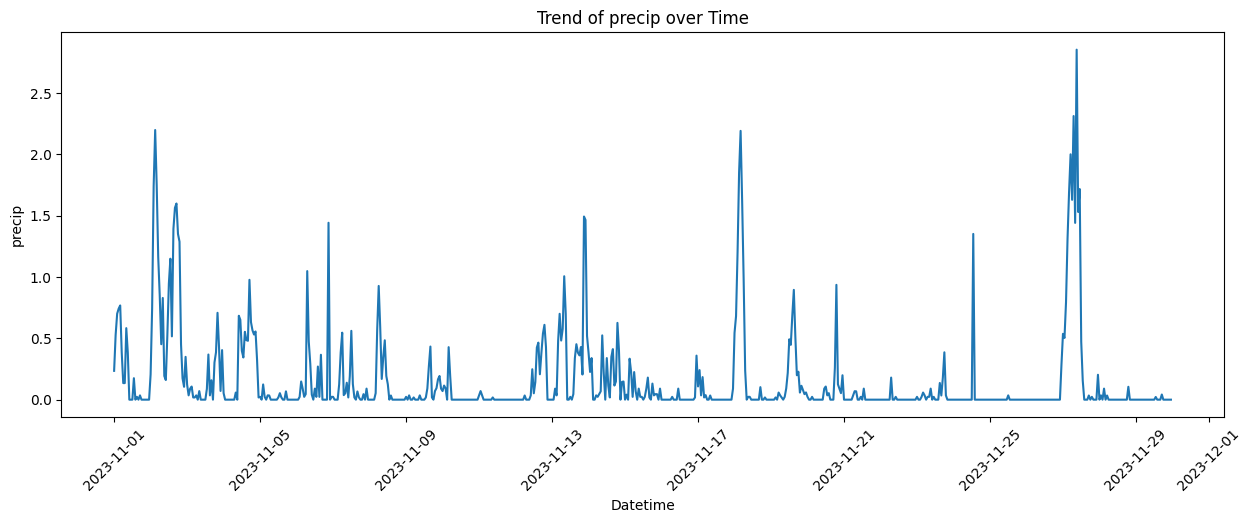

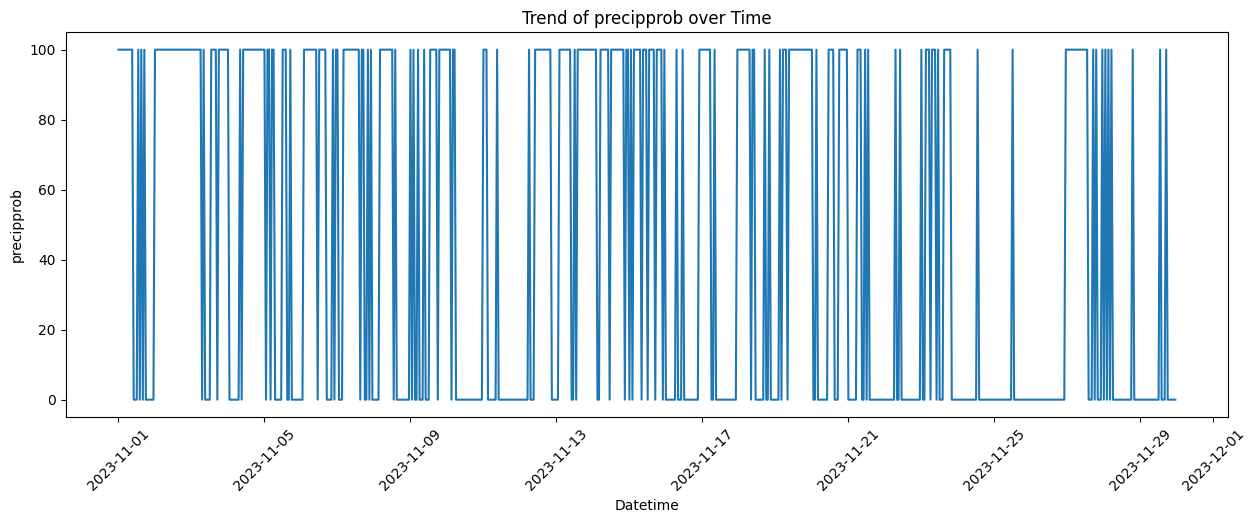

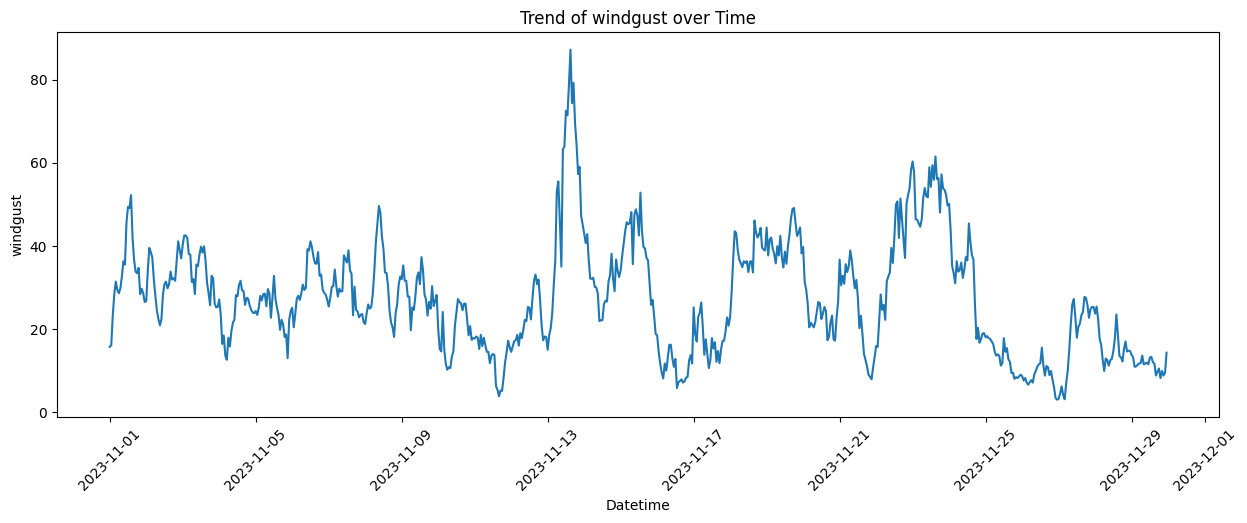

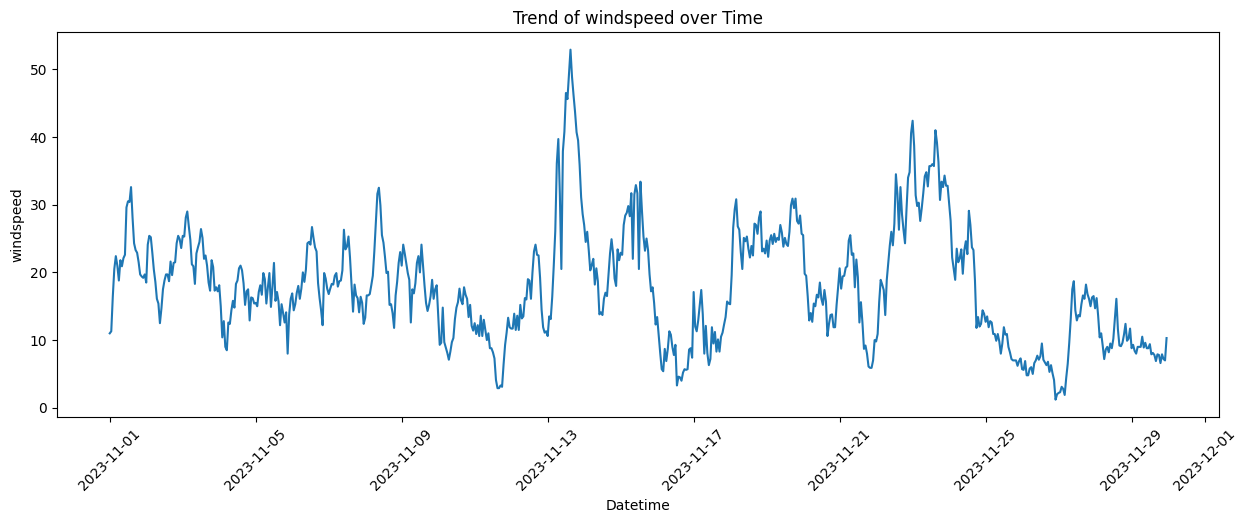

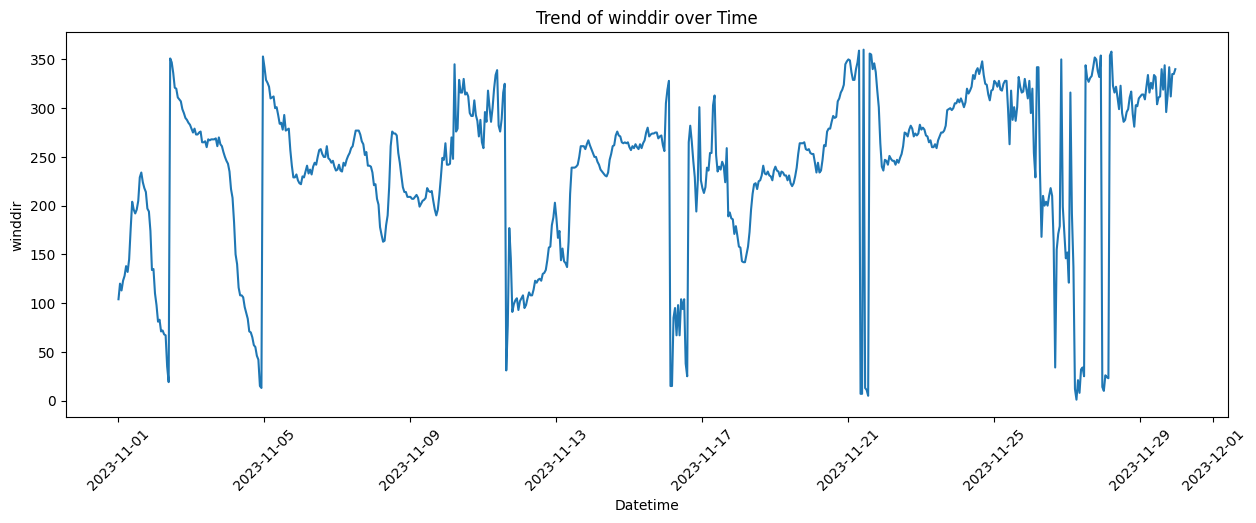

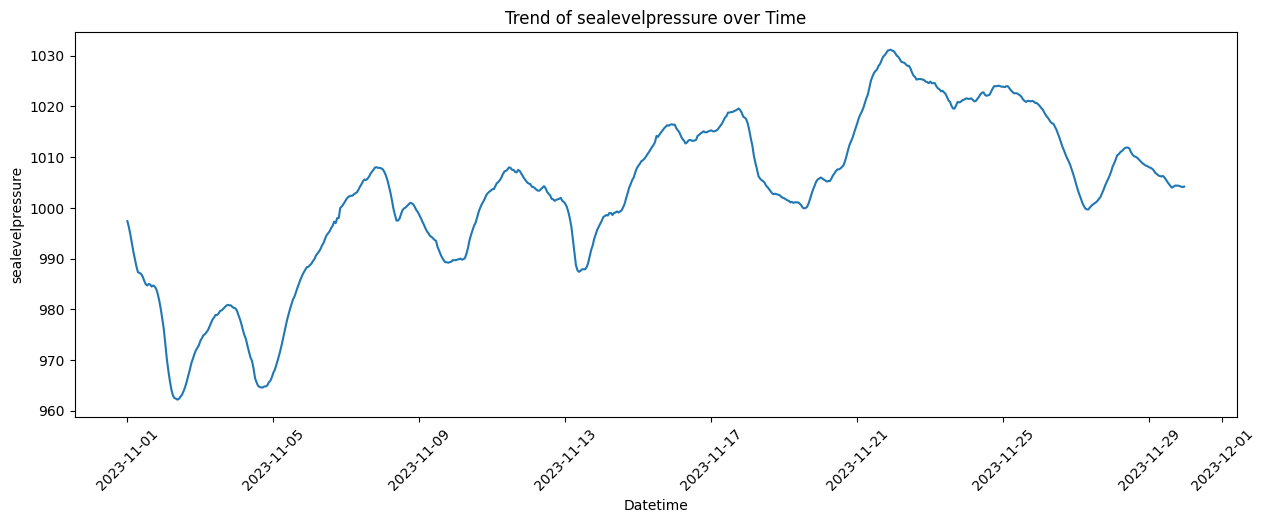

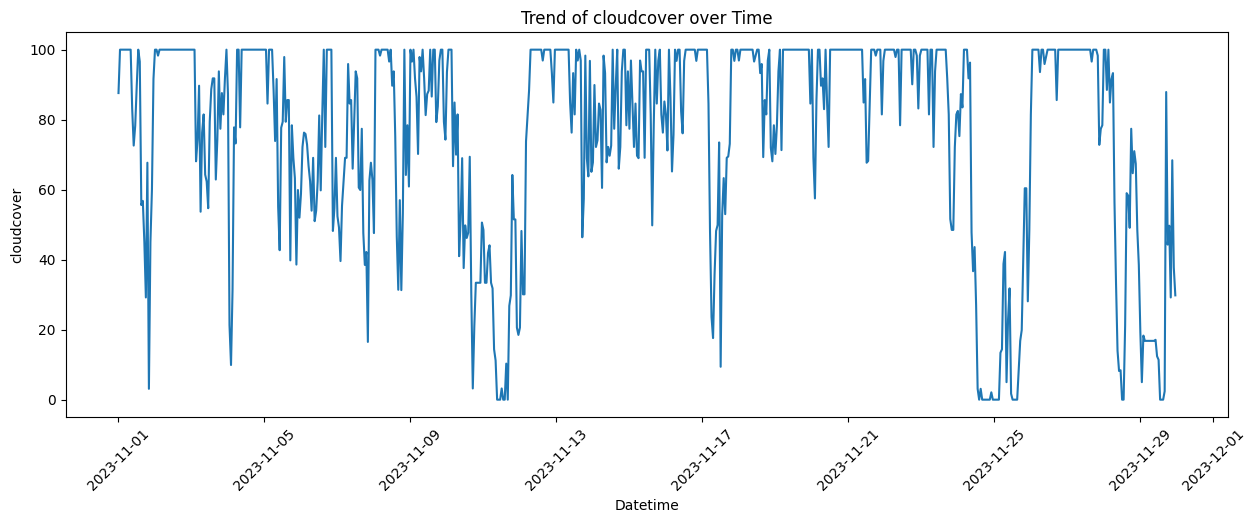

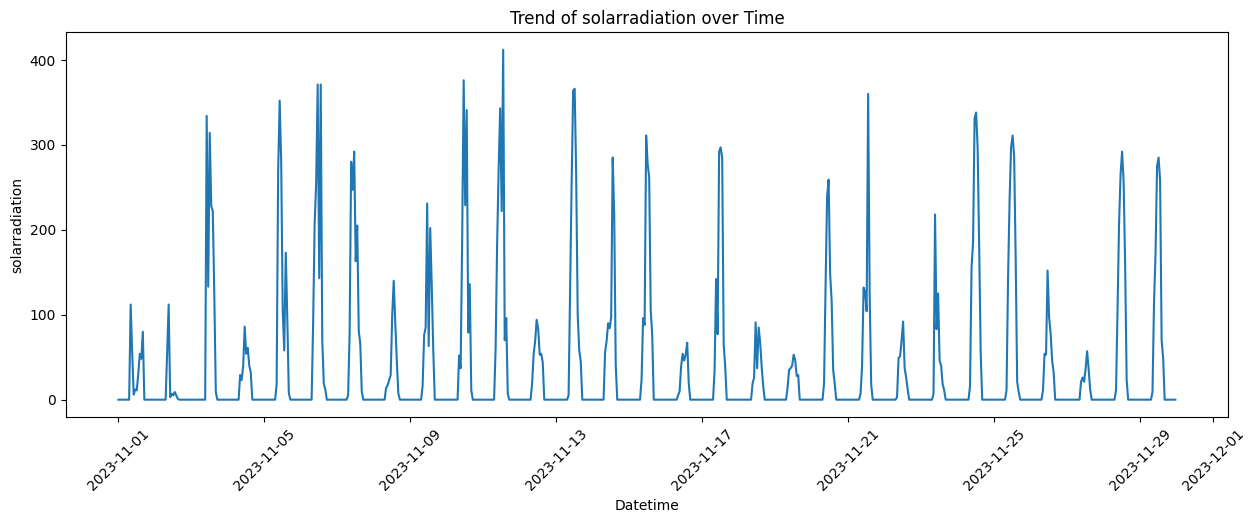

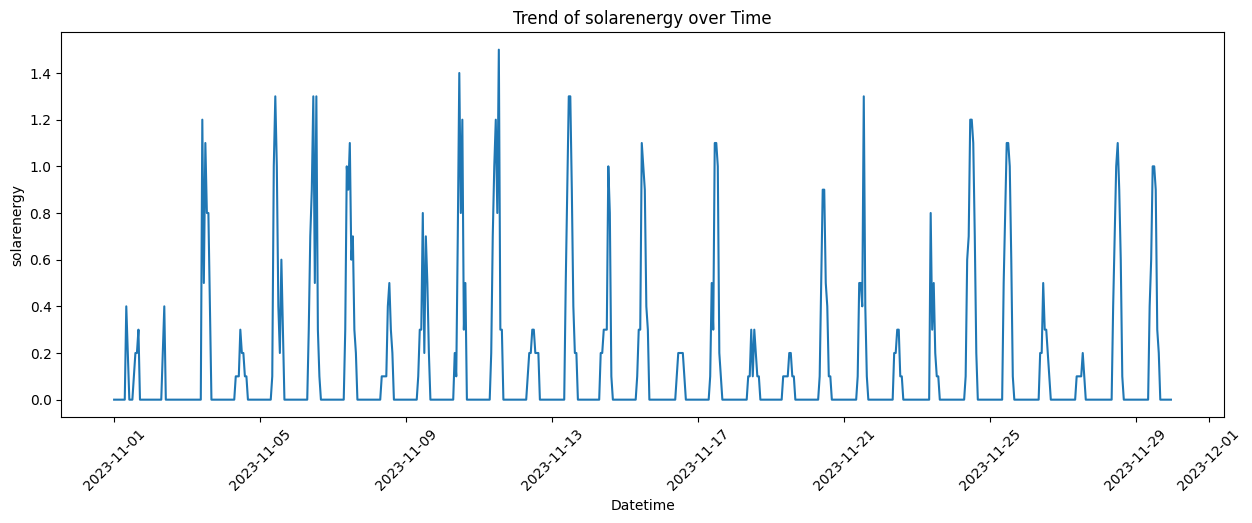

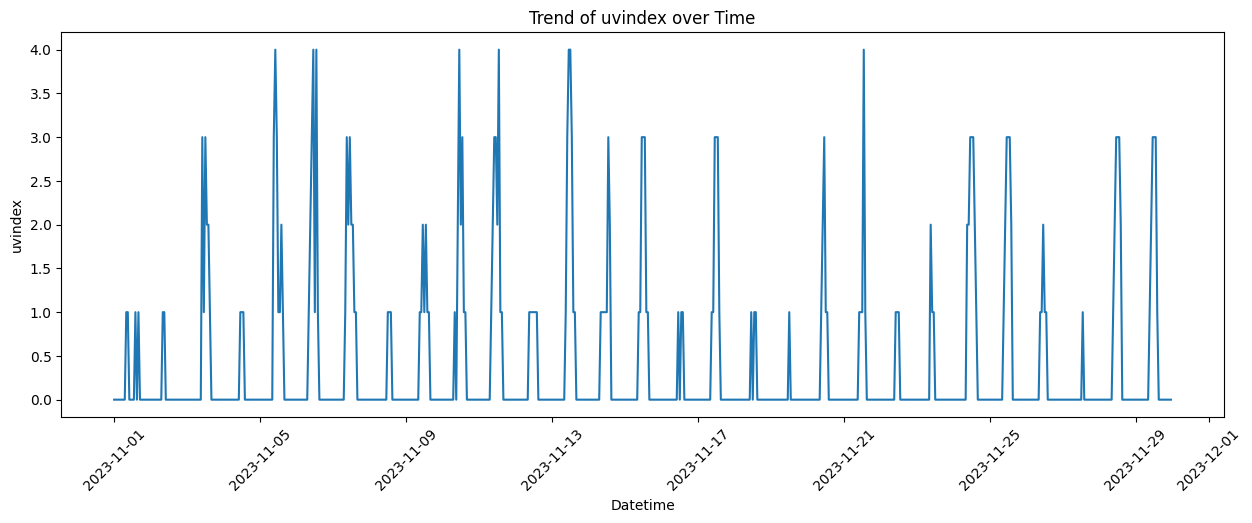

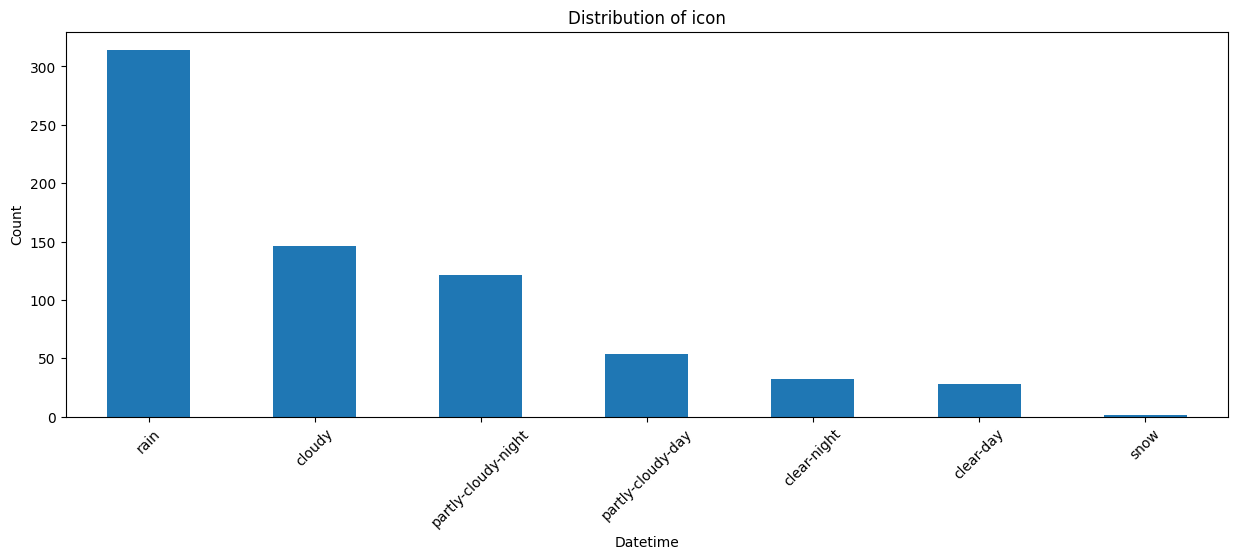

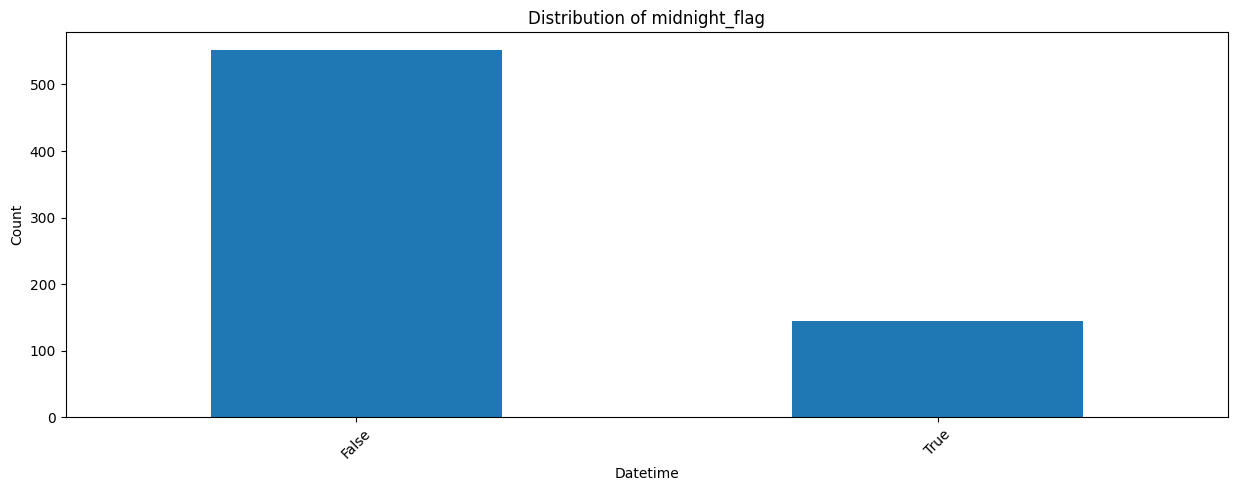

In [59]:

for column in energy_weather_df.columns:
    if column != 'datetime':
        plt.figure(figsize=(15, 5))

        if column in ['midnight_flag', 'icon']:
            energy_weather_df[column].value_counts().plot(kind='bar')
            plt.title(f'Distribution of {column}')
            plt.ylabel('Count')
        else:
            plt.plot(energy_weather_df['datetime'], energy_weather_df[column])
            plt.title(f'Trend of {column} over Time')
            plt.ylabel(column)
        
        plt.xlabel('Datetime')
        plt.xticks(rotation=45) 
        plt.show()